In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Retail.csv")

In [3]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [4]:
#inspecting the dataset
print("Initial Shape", df.shape)
print("\nData Types: \n", df.dtypes)

Initial Shape (2000, 11)

Data Types: 
 TransactionID      object
CustomerID         object
Gender             object
Age                 int64
City               object
ProductCategory    object
Quantity            int64
Price               int64
PurchaseDate       object
PaymentMode        object
TotalAmount         int64
dtype: object


In [5]:
#missing values and duplicates
print("\nTotal Missing Values: \n", df.isnull().sum())
print("\nDuplicate Rows:",df.duplicated().sum())


Total Missing Values: 
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

Duplicate Rows: 0


In [6]:
# Check if there are missing values in TransactionID or ProductCategory
missing_rows = df[df[['TransactionID', 'ProductCategory']].isnull().any(axis=1)]

# Show how many rows are missing
print("Number of rows with missing TransactionID or ProductCategory:", len(missing_rows))

# Optionally display the actual rows
print(missing_rows)

Number of rows with missing TransactionID or ProductCategory: 0
Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount]
Index: []


In [7]:
#not nececessary to run as theres no missing transcation ID or product category
#handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'City' in df.columns:
    df['City']= df['City'].fillna(df['City'].mode()[0])

#drop rows with missing transcation ID or product category
df = df.dropna(subset = ['TransactionID', 'ProductCategory'])

In [8]:
#data cleaning dropping duplicates
df = df.drop_duplicates()

In [9]:
df.head(10)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
5,T00006,C3286,Male,63,Delhi,Furniture,2,2758,2023-05-23,Card,5516
6,T00007,C2679,Other,30,Pune,Electronics,5,781,2023-10-22,Card,3905
7,T00008,C9935,Female,35,Hyderabad,Books,5,4599,2023-11-12,Cash,22995
8,T00009,C2424,Female,41,Jaipur,Books,5,2263,2023-06-10,Cash,11315
9,T00010,C7912,Male,70,Lucknow,Groceries,1,1194,2023-02-20,UPI,1194


In [10]:
if 'Gender' in df.columns:
    # 1. Check for missing values
    print("Missing values:", df['Gender'].isna().sum())
    # 2. Check for leading/trailing spaces
    with_spaces = df[df['Gender'].astype(str) != df['Gender'].astype(str).str.strip()]
    print("Rows with extra spaces:\n", with_spaces['Gender'].unique())
    # 3. Check for lowercase values
    lowercase = df[df['Gender'].astype(str) == df['Gender'].astype(str).str.lower()]
    print("Rows with lowercase entries:\n", lowercase['Gender'].unique())
    # 4. Check for unusually short values (e.g., 1–2 characters like 'm' or 'f')
    short_values = df[df['Gender'].astype(str).str.len() <= 2]
    print("Short values:\n", short_values['Gender'].unique())
    # 5. Show all unique values to review overall messiness
    print("All unique Gender values:\n", df['Gender'].unique())

Missing values: 0
Rows with extra spaces:
 []
Rows with lowercase entries:
 []
Short values:
 []
All unique Gender values:
 ['Female' 'Other' 'Male']


In [11]:
#standarize gender values
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].str.strip().str.lower().map({
        'm': 'Male', 'male': 'Male', 'f': 'Female', 'female': 'Female'
    }).fillna(df['Gender'])


In [12]:
#to check how many rows have non postive values
print("Rows with Quantity <= 0:", (df['Quantity'] <= 0).sum())
print("Rows with Price <= 0:", (df['Price'] <= 0).sum())


Rows with Quantity <= 0: 0
Rows with Price <= 0: 0


In [13]:
#check if a row has problems
b_rows = df[(df['Quantity'] <= 0) | (df['Price'] <= 0)]
print(b_rows)

Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount]
Index: []


In [14]:
print("The result is an empty DataFrame as nothing matched the condition, "
      "where Quantity <= 0 or Price <= 0. The list of columns is shown but there are no rows (Index: []).")

The result is an empty DataFrame as nothing matched the condition, where Quantity <= 0 or Price <= 0. The list of columns is shown but there are no rows (Index: []).


In [15]:
# Remove negative/zero Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [16]:
print(df['PurchaseDate'].head())

0    2023-03-15
1    2023-01-22
2    2023-04-18
3    2023-08-09
4    2023-09-23
Name: PurchaseDate, dtype: object


In [17]:
# Derive TotalAmount if missing or incorrect
df['TotalAmount'] = df['Quantity'] * df['Price']
# Convert PurchaseDate to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')

In [18]:
# Extract Month and DayOfWeek
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [19]:
# Ensure Age is numeric (bad values become NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create AgeGroup column using pd.cut
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 17, 25, 40, 60, 120],   # Age ranges
    labels=["<18", "18-25", "26-40", "41-60", "60+"],  # Group labels
    right=True                        # Include right edge (e.g., 25 goes into 18-25)
)

# Optional: check result
print(df[['Age', 'AgeGroup']].head(10))

   Age AgeGroup
0   33    26-40
1   20    18-25
2   47    41-60
3   21    18-25
4   41    41-60
5   63      60+
6   30    26-40
7   35    26-40
8   41    41-60
9   70      60+


In [20]:
#shows the first few values of age group
print(df['AgeGroup'].head())

0    26-40
1    18-25
2    41-60
3    18-25
4    41-60
Name: AgeGroup, dtype: category
Categories (5, object): ['<18' < '18-25' < '26-40' < '41-60' < '60+']


In [21]:
#see all unique groups
print(df['AgeGroup'].unique())

['26-40', '18-25', '41-60', '60+']
Categories (5, object): ['<18' < '18-25' < '26-40' < '41-60' < '60+']


In [22]:
#count how many rows per group
print(df['AgeGroup'].value_counts())

AgeGroup
41-60    791
26-40    546
60+      387
18-25    276
<18        0
Name: count, dtype: int64


In [23]:
under18 = df[(df['Age'] >= 0) & (df['Age'] < 18)]
print(under18)

Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount, Month, DayOfWeek, AgeGroup]
Index: []


In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#Label Encoding → converts text categories into numbers (so ML can understand them). 

#MinMax Scaling → normalizes numerical values to the same scale (0–1), improving model performance. Formula (default range [0, 1]) 

'''xscaled=[(x - xmean)/(xmax- xmean)]

Where: 
x = the original value
xmin= the minimum in the column 
xmax= the maximum in the column '''

# Encode categorical variables
#fit()Scans the column to learn all unique values (the "classes").Example: For Gender column → ['Female', 'Male']
#transform()Maps each value in the column to its numeric code.Example: Female → 0, Male → 1

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['PaymentMode'] = le.fit_transform(df['PaymentMode'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])

# Normalize numerical columns 
scaler = MinMaxScaler()
df[['Age','Price','TotalAmount']] = scaler.fit_transform(df[['Age','Price','TotalAmount']])

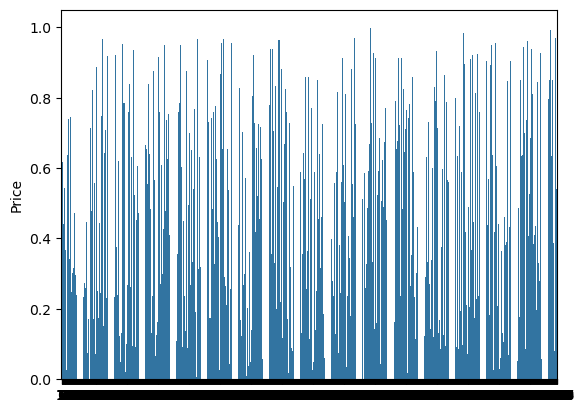

In [25]:
sns.barplot( data = df["Price"])
plt.show()

In [26]:
df["Price"].describe()

count    2000.000000
mean        0.489104
std         0.288562
min         0.000000
25%         0.232449
50%         0.486020
75%         0.733776
max         1.000000
Name: Price, dtype: float64

In [27]:
# Save cleaned dataset
df.to_csv("Retail_Cleaned.csv", index=False)
print("Cleaned dataset Retail_Cleaned.csv")

Cleaned dataset Retail_Cleaned.csv


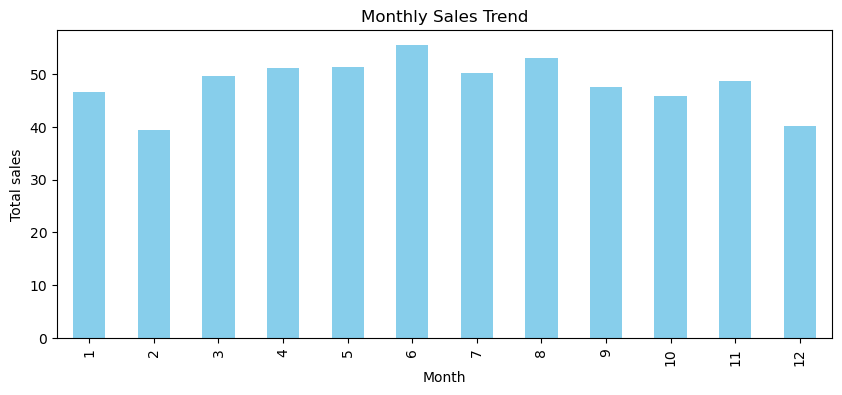

In [28]:
sales_trend = df.groupby('Month')['TotalAmount'].sum()
plt.figure(figsize=(10,4))
sales_trend.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.show()

In [29]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


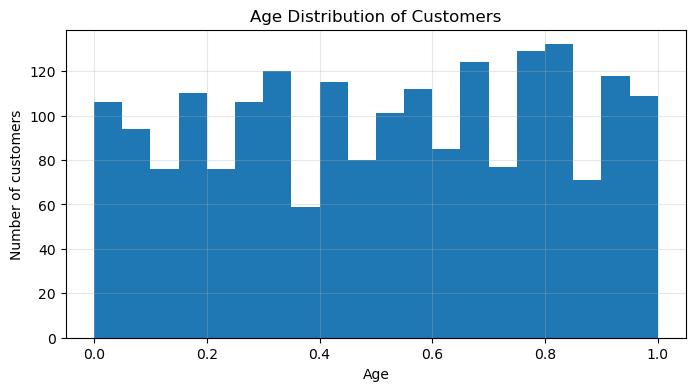

In [33]:
#age distribution histogram
plt.figure(figsize=(8,4))
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Age Distribution of Customers')
plt.grid(True, alpha=0.3)
plt.show()


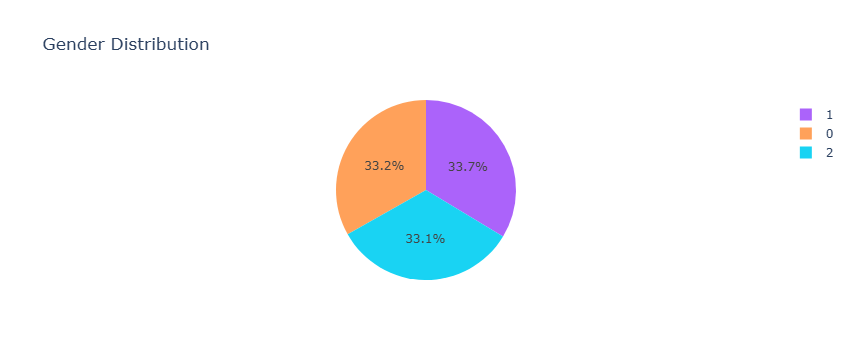

In [37]:
#Gender distribution (piechart)

import plotly.express as px

gender_counts = df['Gender'].value_counts()
color_map = {
    "Male": "blue",
    "Female": "pink",
    "Other": "green"
}
fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title="Gender Distribution",
    color=gender_counts.index,                
    color_discrete_map=color_map              
)
fig.show()


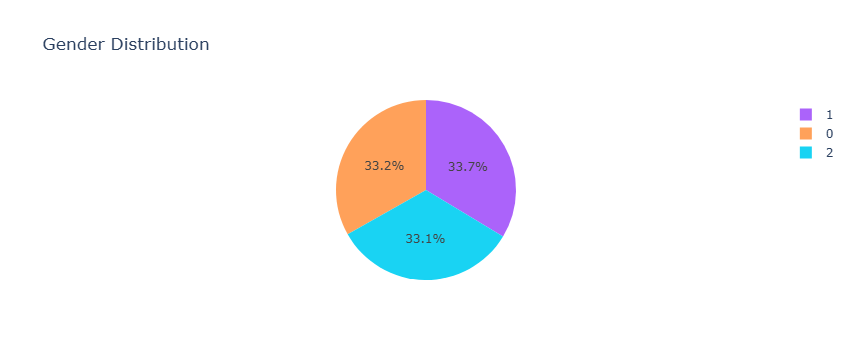

In [39]:
import plotly.express as px

gender_counts = df['Gender'].value_counts()
fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title="Gender Distribution",
    color=gender_counts.index,                # use gender as color key
    color_discrete_map=color_map              # lock colors
)
fig.show()

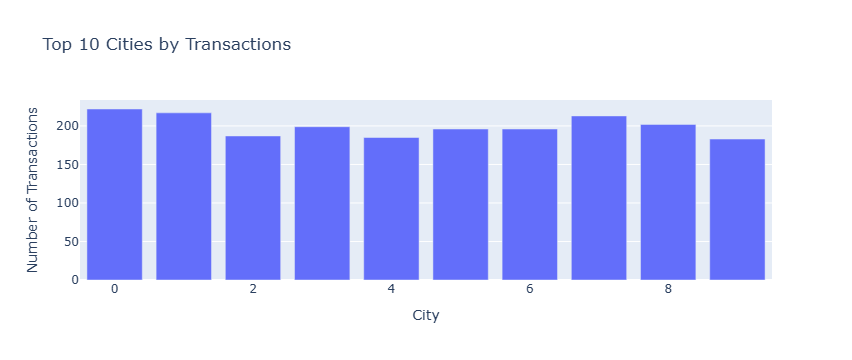

In [44]:
# Top 10 cities by customers
city_counts = df['City'].value_counts().nlargest(10)
fig = px.bar(x=city_counts.index, y=city_counts.values, labels={'x':'City','y':'Number of Transactions'}, title='Top 10 Cities by Transactions')
fig.show()


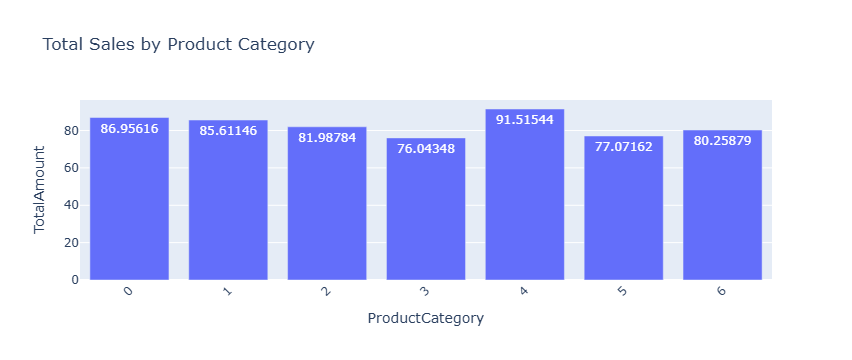

In [45]:
#Total sales by product category
sales_by_cat = df.groupby('ProductCategory', as_index=False)['TotalAmount'].sum().sort_values('TotalAmount', ascending=False)
fig = px.bar(sales_by_cat, x='ProductCategory', y='TotalAmount', title='Total Sales by Product Category', text_auto=True)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [47]:
# Ensure PurchaseDate is datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
# Drop rows where PurchaseDate failed to parse
df = df.dropna(subset=['PurchaseDate'])
# Create Month name and number
df['Month'] = df['PurchaseDate'].dt.month_name()
df['Month_Num'] = df['PurchaseDate'].dt.month

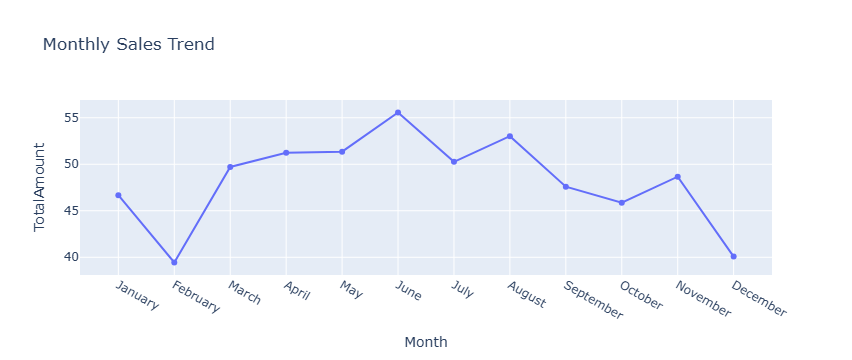

In [49]:
# Monthly sales trend (line chart)
monthly_sales = df.groupby(['Month_Num','Month'], as_index=False)['TotalAmount'].sum().sort_values('Month_Num')
fig = px.line(monthly_sales, x='Month', y='TotalAmount', title='Monthly Sales Trend', markers=True)
fig.update_xaxes(categoryorder='array', categoryarray=monthly_sales['Month'])
fig.show()

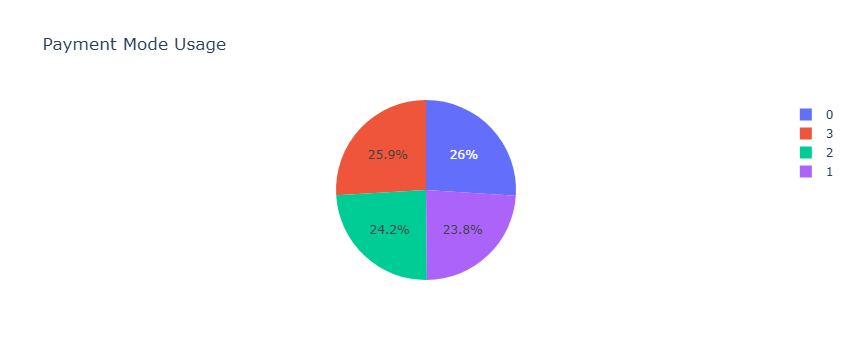

In [51]:
# Payment mode usage (pie)
pay_counts = df['PaymentMode'].value_counts()
fig = px.pie(names=pay_counts.index, values=pay_counts.values, title='Payment Mode Usage')
fig.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23056\955570459.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



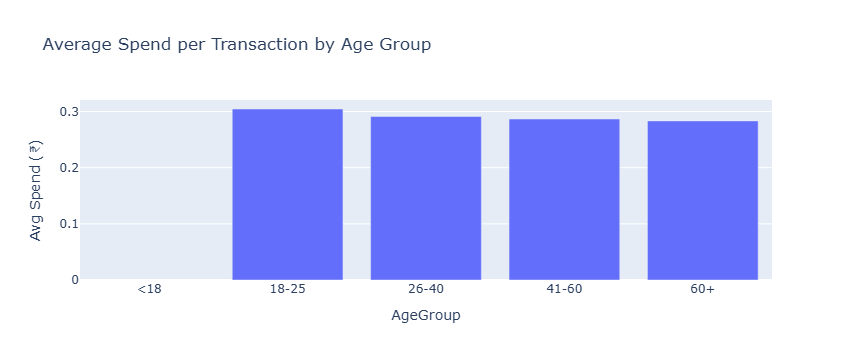

In [52]:
#Average spend per customer by age group
avg_spend_agegroup = df.groupby('AgeGroup', as_index=False)['TotalAmount'].mean().sort_values('AgeGroup')
fig = px.bar(avg_spend_agegroup, x='AgeGroup', y='TotalAmount', title='Average Spend per Transaction by Age Group', labels={'TotalAmount':'Avg Spend (₹)'})
fig.show()


In [54]:
#Top 10 cities by transaction count
top_cities = df['City'].value_counts().nlargest(10).index.tolist()
# Create a new column: keep top 10, others → 'Other'
df['City_Grouped'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')

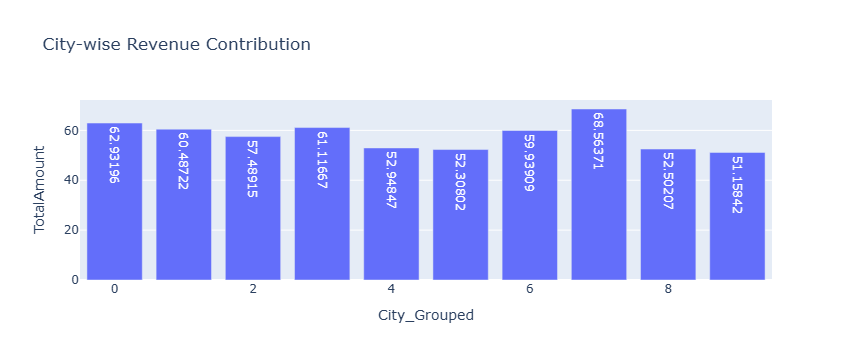

In [55]:
#City-wise revenue contribution (bar)
city_revenue = df.groupby('City_Grouped', as_index=False)['TotalAmount'].sum().sort_values('TotalAmount', ascending=False)
fig = px.bar(city_revenue, x='City_Grouped', y='TotalAmount', title='City-wise Revenue Contribution', text_auto=True)
fig.show()


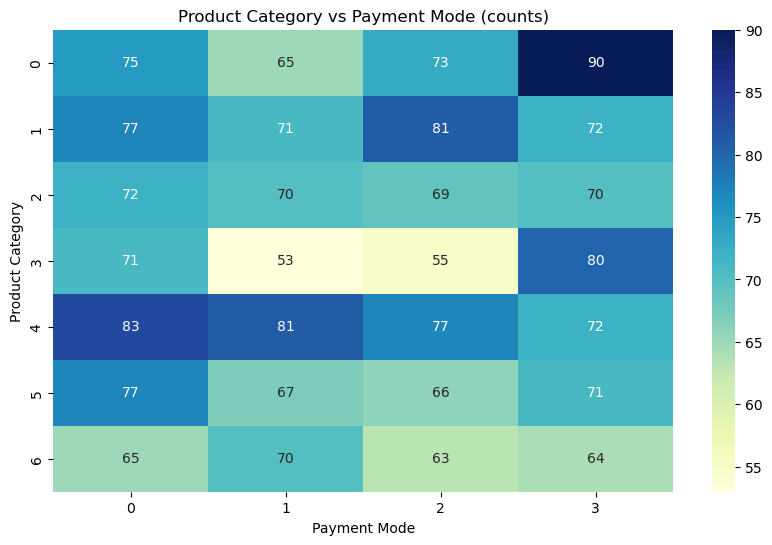

In [58]:
# Heatmap of product category vs payment mode (counts)
ct = pd.crosstab(df['ProductCategory'], df['PaymentMode'])
plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Product Category vs Payment Mode (counts)')
plt.xlabel('Payment Mode')
plt.ylabel('Product Category')
plt.show()